In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from casadi import *
import scipy.interpolate
import math

**create constraints and initilize optimization variables**

1. Here the constraints are bounday conditions around the magins(inequality constraint)
2. waypoints are(equality constraint)
3. Destination(equality constraint)
4. Obstacles(inequality constraint)


**The optimization varilables are control inputs**

1. U1= Linear Velocity 
2. U2= Angular Velocity

In [2]:
from casadi import *
from numpy import *
%matplotlib inline
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
class Iteration_Callback(Callback):
    def __init__(self, name, nx, ng, opts={}):
        Callback.__init__(self)

        self.nx = nx
        self.ng = ng

        self.x_sols = []
        self.f_sols = []
        self.g_sols = []
        self.lam_x_sols = []
        self.lam_g_sols = []
        self.lam_p_sols = []
        '''
        #for plotting the graph in realtime
        self.fig= plt.figure()
        self.ax1= self.fig.add_subplot(1,2,1)
        self.ax2= self.fig.add_subplot(2,2,1)
        self.fig.show()
        '''
        # Initialize internal objects
        self.construct(name, opts)

    def get_n_in(self): return nlpsol_n_out()
    def get_n_out(self): return 1
    def get_name_in(self, i): return nlpsol_out(i)
    def get_name_out(self, i): return "ret"

    def get_sparsity_in(self, i):
        n = nlpsol_out(i)
        if n == 'f':
            return Sparsity.scalar()
        elif n in ('x', 'lam_x'):
            return Sparsity.dense(self.nx)
        elif n in ('g', 'lam_g'):
            return Sparsity.dense(self.ng)
        else:
            return Sparsity(0, 0)

    def eval(self, arg):
        
        darg = {}
        for (i, s) in enumerate(nlpsol_out()): darg[s] = arg[i]
        x_sol = [float(elem) for elem in darg['x'].full()]
        
        self.x_sols.append(x_sol)
        self.f_sols.append(darg['f'].full()[0][0])
        self.g_sols.append(darg['g'].full()[0][0])
        self.lam_x_sols.append(darg['lam_x'].full())
        self.lam_g_sols.append(darg['lam_g'].full())
        self.lam_p_sols.append(darg['lam_p'].full())
        #print("solution",self.f_sols)
        '''
        #for plotting the graph in realtime
        self.ax1.plot(self.x_sols)
        self.ax2.plot(self.f_sols)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        plt.show()
        '''
        plt.plot(self.f_sols,color='C0')
        #plt.plot(self.g_sols,color='C0')
        #print(self.g_sols)
        return[0]

#generating spline for angle
import scipy.interpolate
dest=[3,1,45]
#way=[3,1]
n=dest[0]/0.1
time=dest[0]/0.2  
angle_rad=dest[2]*(np.pi/180)
print(angle_rad)
tk = np.array([0.0, 5,10])
t1 = np.arange(0.0,10,1) 
out=np.array([0,dest[1],angle_rad])
fkp = scipy.interpolate.interp1d(tk, out, kind="quadratic")
kp = [fkp(ti) for ti in t1]
plt.plot(kp)
print(tk)
print(t1)

In [706]:
from casadi import *
import math
dest=[4,2,90]
#way=[3,1]  
angle_rad=dest[2]*(np.pi/180)
t=SX.sym('t')
v=SX.sym('v')
dt= 20
rob_rad=0.1
obs_rad=0.1
ang=SX.sym("ang",dt)
#v=SX.sym("v")
#t=SX.sym("t")
print(ang)
func,func1,func2=0,0,0
g=0
theta=0
fuel_cost=0
angle=0
coff=0.0045
ang_coeff=1
for i in range(0,dt):
        func1=func1+v*cos(theta)*t
        func2=func2+v*sin(theta)*t
        theta=theta + (v / 1.2)*tan(ang[i])*t
        angle= sqrt((theta-angle_rad)**2)*ang_coeff
        #if i>=dt/2:
        fuel_cost=fuel_cost+(-0.0177*v**2+1.48*v+3.39)
        #if i==dt/2:
            #func_con=(sqrt(coff+(func1-way[0])**2+(func2-way[1])**2))
        if i==dt-1:
            func=(sqrt(coff+(func1-dest[0])**2+(func2-dest[1])**2))+fuel_cost+angle
            #g=sqrt((func1-way[0])**2+(func2-way[1])**2)-(rob_rad+obs_rad)
            #g=func_con
            print(func)     
            print(g)
nlp= {}
nlp['x']=vertcat(ang,v,t)
nlp['f']=func
nlp['g']=0
mycallback = Iteration_Callback('mycallback',(dt+2), 1)
opts = {}
opts['iteration_callback'] = mycallback
opts['ipopt.tol'] = 1e-8
opts["ipopt.max_iter"]=2000
#create solver instance
F = nlpsol('F','ipopt',nlp,opts);
print(F)

[ang_0, ang_1, ang_2, ang_3, ang_4, ang_5, ang_6, ang_7, ang_8, ang_9, ang_10, ang_11, ang_12, ang_13, ang_14, ang_15, ang_16, ang_17, ang_18, ang_19]
@1=1.2, @2=(((v/@1)*tan(ang_0))*t), @3=(@2+(((v/@1)*tan(ang_1))*t)), @4=(@3+(((v/@1)*tan(ang_2))*t)), @5=(@4+(((v/@1)*tan(ang_3))*t)), @6=(@5+(((v/@1)*tan(ang_4))*t)), @7=(@6+(((v/@1)*tan(ang_5))*t)), @8=(@7+(((v/@1)*tan(ang_6))*t)), @9=(@8+(((v/@1)*tan(ang_7))*t)), @10=(@9+(((v/@1)*tan(ang_8))*t)), @11=(@10+(((v/@1)*tan(ang_9))*t)), @12=(@11+(((v/@1)*tan(ang_10))*t)), @13=(@12+(((v/@1)*tan(ang_11))*t)), @14=(@13+(((v/@1)*tan(ang_12))*t)), @15=(@14+(((v/@1)*tan(ang_13))*t)), @16=(@15+(((v/@1)*tan(ang_14))*t)), @17=(@16+(((v/@1)*tan(ang_15))*t)), @18=(@17+(((v/@1)*tan(ang_16))*t)), @19=(@18+(((v/@1)*tan(ang_17))*t)), @20=(@19+(((v/@1)*tan(ang_18))*t)), @21=-0.0177, @22=1.48, @23=3.39, ((sqrt(((0.0045+sq((((((((((((((((((((((v*t)+((v*cos(@2))*t))+((v*cos(@3))*t))+((v*cos(@4))*t))+((v*cos(@5))*t))+((v*cos(@6))*t))+((v*cos(@7))*t))+((v*cos(@

[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2]
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      253

Total number of variables............................:       22
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       22
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality co

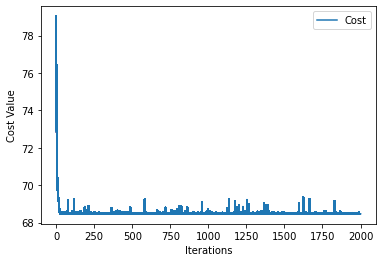

In [707]:
#solver=F(x0=[0.1,2],lbx=lbx,ubx=ubx)
x0=[]
lbx=[]
ubx=[]
# the loop for setting angle
for i in range(0,dt):
    x0.append(0.02)
    lbx.append(-0.52359)
    ubx.append(0.52359)
# the loop for setting velocity  
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    ubx.append(3)
# the loop for setting sample time 
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    #ubx.append(2) #previous value
    ubx.append(100)
print(x0)
solver=F(x0=x0,lbx=lbx,ubx=ubx,lbg=0,ubg=0)
out=[]
out.append(solver["x"])
print("solved output",out)
print("solved function output",solver["f"])
plt.legend(["Cost"])
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

angle [DM(-0.0901727), DM(-0.0826995), DM(0.0187362), DM(0.0344543), DM(-0.343289), DM(0.378001), DM(0.4247), DM(0.447563), DM(0.464752), DM(0.479539), DM(0.492323), DM(0.501543), DM(0.506661), DM(0.508888), DM(0.497821), DM(0.488573), DM(0.509354), DM(0.512944), DM(0.513404), DM(0.511203)]
v [DM(0.0201736)]
T [DM(12.6428)]
3.9886 1.99866


Text(0, 0.5, 'Y Coordinates')

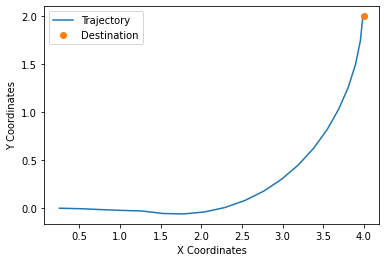

In [708]:
import matplotlib.pyplot as plt
import math
ang=[]
v=[]
t=[]
th=[]
for i in range(0,dt):
    ang.append(out[0][i])
print("angle",ang)
v.append(out[0][dt])
t.append(out[0][dt+1])
print("v",v)
print("T",t)
xc,yc=[],[]
theta=0.0
x1,x2=0,0
for i in range(0,dt):
    x1=x1+v[0]*math.cos(theta)*t[0]
    x2=x2+v[0]*math.sin(theta)*t[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t[0]
    xc.append(x1)
    yc.append(x2)
    th.append(theta)
print(x1,x2)
#plt.figure(figsize=(6, 4))
plt.plot(xc,yc,dest[0],dest[1],"o")
plt.legend(["Trajectory","Destination"])
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")


0.0
1.06734e-013


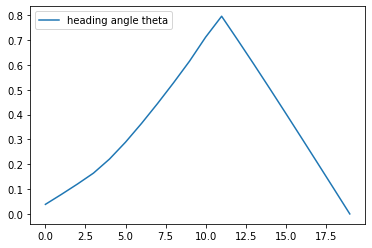

In [602]:
plt.plot(th)
plt.legend(["heading angle theta"]) 
print(angle_rad)
print(th[-1])